# Numpy Lab Egor Ermakov 6132

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Numpy functions overview 
 Взять из документации по numpy 12 любых функций / методов / операторов и продемонстрировать из работу в блокноте. Демонстрация каждой функции в своей ячейке. Если снабдите комментарием что делает данная операция — будет вообще прекрасно.

In [2]:
arr = np.empty((10,10)) # create an empty array shaped like an input tuple

In [3]:
np.shape(arr) # returns the tuple containing the shape of the input array

(10, 10)

In [4]:
np.zeros(np.shape(arr)) # create an array of zeros of the input shape

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
np.arange(10,step = 2) # create an array of nubmers with a given step

array([0, 2, 4, 6, 8])

In [6]:
arr = np.random.normal(0,1,10) # create an array of normally distributed values with given mean and variance 

In [7]:
np.where(arr>0) # return the indices of the array that return true to the given condition

(array([0, 2, 4, 7, 8, 9], dtype=int64),)

In [8]:
np.mean(arr) # return the computed mean value of the input array

0.06983369083588195

In [9]:
np.max(arr) # return the maximum value of the given array

1.4439792873489743

In [10]:
np.sum(arr) # return the sum of the array

0.6983369083588195

In [11]:
arr = np.concatenate((arr,np.zeros(10,))) # concatenates arrays by the given axis

In [12]:
np.abs(arr) # returns the absolute values of the given array

array([1.44397929, 2.26062787, 0.09006145, 0.2718438 , 0.15054258,
       0.38090075, 0.04654731, 0.2082734 , 1.37731926, 0.38808067,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [13]:
np.bincount(np.abs(arr.astype(np.int64))) # returns the number of elements in array by value

array([17,  2,  1], dtype=int64)

# 2. Olap Cube creation
Сгенерировать OLAP-куб, где фиксируем продажи товаров в розничной сети по магазинам.
Оси:
    0: ID группы товаров
    1: ID магазина
    2: день месяца, в котором осуществляются продажи (предположим у нас в OLAP-кубе собраны продажи за месяц).
Содержимое ячейки: продажи в тыс. рублей данной категории товаров в данном магазине в данный день.

Рекомендуется сгенерировать статистически-правдопододные данные в ячейках.
К примеру, будет странно, если продажи одной и той же группы товаров в соседние дни будут представлять из себя "белый шум". Пусть будет какой-то правдоподобное распределение на ваш вкус.
Также продажи одних и тех же групп товаров в разных магазинах не могут отличаться в сотни и тысячи раз, максимум в разы.
Подумайте как это обыграть используя различные функции генерации случайных чисел + "смекалку".
"Правильного" решения тут нет, любое решение подойдёт, если будет понятно, что вы хотя бы попытались применить интеллект )



In [14]:
olap_cube = np.empty((3,5,30)) #(wares,cities,days)

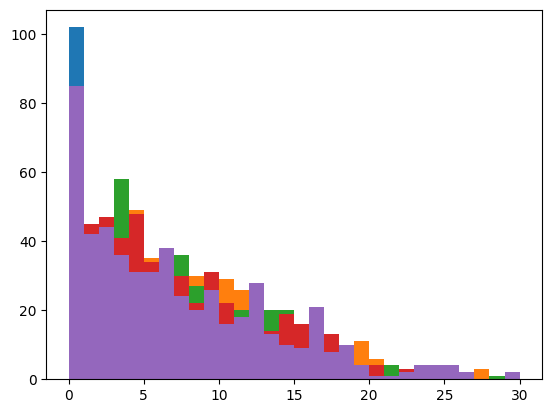

In [15]:
# an array of normaly distriduted data 
olap_cube[0] = np.random.normal(10,1,(5,30)).astype(np.int64)

# an array of the exponentially decaying data portrayed in the picture
arr = np.zeros((5,30))
for i in range(arr.shape[0]):
    arr[i] = plt.hist(np.random.normal(0,10,1000).astype(np.int64),range(31))[0]
olap_cube[1] = arr

# an array of normally distributed data with greater mean and variance
olap_cube[2] = np.random.normal(100,20,(5,30)).astype(np.int64)

# 3. Data processing
Для получившегося OLAP-куба посчитать суммарные, средние, минимальные и максимальные продажи (на самом деле любые агрегатные функции можно использовать), зафиксировав значения по одной, двум или трём осям:
например взять какой-то определённый набор товаров и набор городов или диапазон дней и сагрегировать данные по всем ячейкам из зафиксированного набора.
Пример: получить сумму, среднее, минимум и максимум по продажам 10-20 чисел месяца для товаров [1,3,4] по всем городам (или по конкретному набору городов).
Попробуйте различные варианты индексации и различные варианты срезов, насколько хватит фантазии.


In [16]:
# min values of sales for all cities throughout all days for all products
olap_cube[np.where(olap_cube == olap_cube.min())]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# max values of sales for all cities throughout all days for all products
olap_cube[np.where(olap_cube == olap_cube.max())]

array([153., 153.])

In [18]:
# min values of sales for all cities throughout all days for each product
for arr in olap_cube:
    print(arr[np.where(arr == arr.min())])

[6.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[38.]


In [19]:
# max values of sales for all cities throughout all days for each product
for arr in olap_cube:
    print(arr[np.where(arr == arr.max())])

[13.]
[102.]
[153. 153.]


In [20]:
# mean values of sales for each product
for arr in olap_cube:
    print(arr.mean())

9.433333333333334
18.153333333333332
97.45333333333333


In [21]:
# summed values of sales for each product
for arr in olap_cube:
    print(arr.sum())

1415.0
2723.0
14618.0


In [22]:
# mean of the sales for each product from 20th day on
for arr in olap_cube:
    print(arr[:,20:].mean())

9.62
1.8
97.1
